# Handson 06 - Matlab

## Modulação em Amplitude
    
Por ser a maioria dos sinais em banda base sinais de baixa frequência, estes não podem ser transmitidos efetivamente via radio (wireless). Modular sinais em banda base permite uma melhor distribuição das frequências sem que as transmissões interferam na outra. Para isso cada sinal é modulado em frequências de portadoras diferentes dentro de uma faixa de banda.

Se tratando de modulação, trataremos os seguinte termos:
- **$m(t)$** : Sinal em banda base (Sinal modulante)
- **$W$**    : Banda do sinal em banda base (Sinal modulante)
- **$s(t)$ **: Sinal em banda passante (Sinal modulado)
- **$B$    **: Banda do sinal em banda passante (Sinal modulado)
- **$c(t)$ **: Sinal portadora
- **$f_{c}$**: Frequência da portadora

Existem tres variáveis numa onda senoidal: amplitude, frequência (Instantânea) e fase. Um sinal mensagem pode ser usado pra modular qualquer um desses parâmetros permitindo que $s(t)$ porte a informação do transmissor para o receptor.


Amplitude $A(t)$ é proporcional a $m(t)$ $\Leftrightarrow $ Amplitude modulation -AM

Frequência é proporcional a $m(t)$      $\Leftrightarrow $ Frequency modulation -FM

Fase é proporcional a $m(t)$         $\Leftrightarrow $ Phase modulation -PM


Quando se trata de Modulação AM a amplitude é caracteriza a informação a ser enviada, sendo a frequência e a fase constante. A equação que descreve a onda AM-DSB (double-sideband) é dada por:
$$S_{DSB}(t)=A_{c}\cdot[1+m_{a}\cdot cos(2 \pi  f_{m} t)]\cdot cos(2\pi f_{c}t);     $$       

Em que o índice de modulação $m_{a}$ é dado por:
$$m_{a}=\frac{A_{m}}{A_{c}}$$

Podemos expandir a equação da seguinte forma:
$$S_{DSB}(t)=A_{c}\cdot cos(2\pi f_{c}t)+m(t)\cdot cos(2\pi f_{c}t)$$

Então:
$$S_{DSB}(t)= c(t)+S_{SC}(t)$$

Em que $c(t)$ é a portadora e $S_{SC}$ é a Modulação AM suprimida da portadora (suppressed-carrier).

Para visualizar em frequência o sinal, faremos a transformada de fourrier de $c(t)$ (definido em $F_{c}$) e do sinal $S_{SC}$:

$$m(t)cos(2\pi f_{c}t)\Leftrightarrow \frac{1}{2}[M(f+f_{c})+M(f-f_{c})]$$

Sendo $M(f+f_{c})$ deslocamento para direita e $M(f-f_{c})$ deslocamento para esquerda. Nota-se a formação de banda USB(up side band) externo a $f_{c}$ e LSB(Low side band) interna a $f_{c}$ com faixa de frequencia agora de $W=2f_{m}$. Caso a portadora tivesse uma frequência muito baixa tal que $f_{c}\leq W$, haveria a sobreposição dos espectros laterais um no outro tornando-se impossível recuperar a informação $m(t)$. Portanto é necessário que a frequência da portadora seja, no mínimo, $f_{c}\geq W$.

### AM-DSB 
#### Sinal no tempo e frequência
Para exemplificar, no script a seguir será feita a modulação de um sinal em AM e em seguida sua visualização no tempo e na frequência.

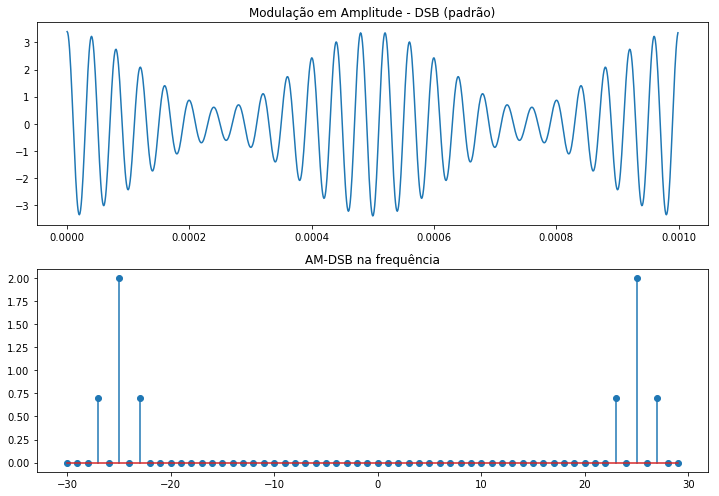

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

#parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu = 0.7                                                       # Índice de modulação
fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000

t = np.arange(N)*1e-6
s = Ac*(1+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

#s(t) = Ac[1+MuCos(2pifmt)]Cos(2pifct)
lfft = 30 #número de pontos da fft
k = np.arange(-lfft,lfft) #60 pontos

S_f = 2.0*np.abs((fftpack.fft(s)))/N
Ns = len(s)                                                 # Comprimento do vetor 'x'
Nk = len(k)                                                 # Comprimento do vetor 'k'
S_f_new = np.zeros(Nk)                              # Define vetor da frequencia como um vetor zeros de comprimento k

for i in range(Nk):
    kk = k[i]
    if kk>=0:
        S_f_new[i] = S_f[kk]
    else :
        S_f_new[i] = S_f[Ns+kk]



plt.figure(1,[10,7])
plt.subplot(211)
plt.plot(t,s)
plt.title("Modulação em Amplitude - DSB (padrão)")

freq = fftpack.fftshift(fftpack.fftfreq(len(S_f),10**6))
plt.subplot(212)
plt.title("AM-DSB na frequência")
#plt.xlim([-50,50])
plt.stem(k,S_f_new)



plt.tight_layout()
plt.show()

Pode-se ver que houve a formção de $M(f+f_{c})$ e $M(f-f_{c})$ e também, adjacente a portadora encontram-se a parcela USB (externa) e LSB (interna) como mencionado acima.

#### Recepção AM-DSB (detecção de envoltória) 
O circuito demodulador AM-DSB é composto por tres elementos 
![Figura01](./handsOn6_matlab_figs/Demodulador_AM.png)
(melhorar resistor, ajustar proporção, colocar descarregamento do capacitor)


Neste circuito primeiramente é retificado o sinal com um diodo. Em seguida com um paralelo de capacitor e resistor ocorre a carga e descarga do capacitor conforme o sinal de entrada é maior ou não do que a carga atual do capacitor. 

Montaremos então um script que fará a modulação AM-DSB e em seguida sua demodulação. Faremos um laço com as condições de carga e descarga do capacitor e nele acrescentaremos o termo tau ($\tau $) como a constante de descarga do capacitor - resistor.

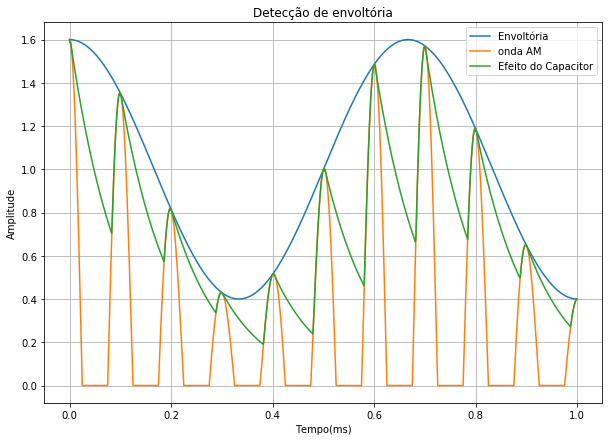

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

t = np.arange(1000)*1e-6                                        # Definição do vetor tempo
Ts=1e-6                                                         # Definiçao do periodo
fc = 10000                                                      # Frequencia da portadora.
fm = 1500                                                       # Frequencia do sinal
tau = 1e-4                                                      # Constante de tempo do detector de envelope.
Mu = 0.6                                                        # Indice de modulaçao.
Ac = 1.0
x_AM = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);                   # Onda Modulada AM-DSB

x_AM = x_AM*(x_AM>0)                                 #pegando só o semiciclo positivo do sinal (efeito do diodo)

x_env1 = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))  #envoltória ideal
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1

#cálculo da saída:
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            #carga do capacitor
    else :
        out *= (1-Ts/tau)    #descarga do capacitor
    x_env[i] = out

plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_env1)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env)
plt.grid()
plt.legend(["Envoltória","onda AM","Efeito do Capacitor"])
plt.show()

Esse tipo de modulação é recomandado em sistemas de difusão, em que há um grande numero de receptores em relação ao de transmissores, é mais econômico um transmissor caro de alta potência e receptores baratos, para que haja maior difusão.
### AM-DSB-SC 
#### Sinal no tempo e frequência
O sinal AM-DSB-SC consiste em suprimir a portadora da AM-DSB, deixando o sinal unicamente proporcional à mensagem, em outras palavras, quando não houver sinal $m(t)$ não haverá sinal enviado. 
Faremos neste script a modulação de um sinal AM-DSB-SC ($m(t)\cdot cos(2\pi f_{c}t)$). Será possível ver que haverá uma queda na frequencia da portadora $f_{c}$ como previamos.

In [1]:
#código por fazer

#### Recepção AM-DSB-SC (detecção coerente) 
Demodular um sinal AM-DSB-SC em termos de código é extremamente simples, visto que basta devolver a portadora ao sinal enviado multiplicando os dois e em seguida um filtro passa-baixa que teremos o sinal $m(t)$.

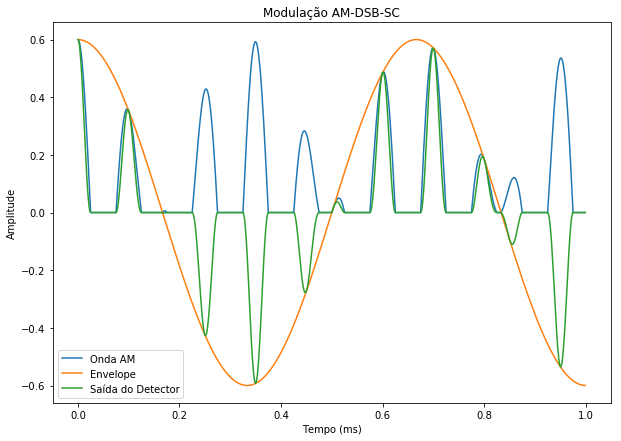

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

Ts = 1e-6
t = np.arange(1000)*Ts
fc = 10000                                                  # Frequencia da portadora.
fm = 1500                                                   # Frequencia do sinal
tau = 3e-5                                                  # Constante de tempo do detector de envelope.
Mu = 0.6                                                    # Indice de modulaçao.
x_AM = Mu*np.cos(2*np.pi*fm*t)*np.cos(2*np.pi*fc*t);                   # Onda Modulada AM-DSB-SC
x_env1 = Mu*np.cos(2*np.pi*fm*t) #envelope ideal
x_AM = x_AM*(x_AM>0)
x_env= np.zeros(len(x_AM))
#cálculo da saída
x_env = x_AM*np.cos(2*np.pi*fc*t)

plt.figure(1,[10,7])
sinal_AM = plt.plot(t*1000,x_AM)
envelope_ideal = plt.plot(1000*t,x_env1)
detector = plt.plot(t*1000,x_env)
plt.legend(["Onda AM","Envelope","Saída do Detector"])
plt.xlabel("Tempo (ms)")
plt.ylabel("Amplitude")
plt.title("Modulação AM-DSB-SC")
plt.show()

Porém em termos práticos há um custo muito elevado de se gerar um sinal da portadora em fase com o sinal recebido, não sendo apropriado para sistemas de difusão e sim pra transmissão ponto a ponto (mesmo numero de transmissores e receptores). 

### AM-SSB  
#### Sinal no tempo e frequência 

Na modulação AM formam-se duas bandas laterais, como já comentado anteriormente, que possuem a informação completa do sinal $m(t)$. Em consequência, para um sinal em banda base, a modulação AM-DSB requer o dobro de largura de banda necessário para a transmissão. Para melhorar a eficiência espectral de banda, bem como a de potência de transmissão, basta transmitir uma delas e filtrando a outra, resultando num novo tipo de transmissão AM-SSB. Além disso, podemos remover a portadora do sinal, resultando na AM-DSB-SC. A demodulação do sinal AM-SSB-SC é exatamente a mesma de um sinal AM-DSB-SC. A grande vantagem da AM-SSB-SC está na economia de até 83% da potência de transmissão, embora sejam necessários osciladores tão precisos quanto os da AM-DSB-SC.

No script abaixo, é exemplificado o processo de modulação e demodulação da AM-SSB. Inicialmente modula-se a onda AM em DSB-SC e em seguida é feita a filtragem de frequências superiores (LSB) ou inferiores (USB) da onda DSB, formando AM-SSB.

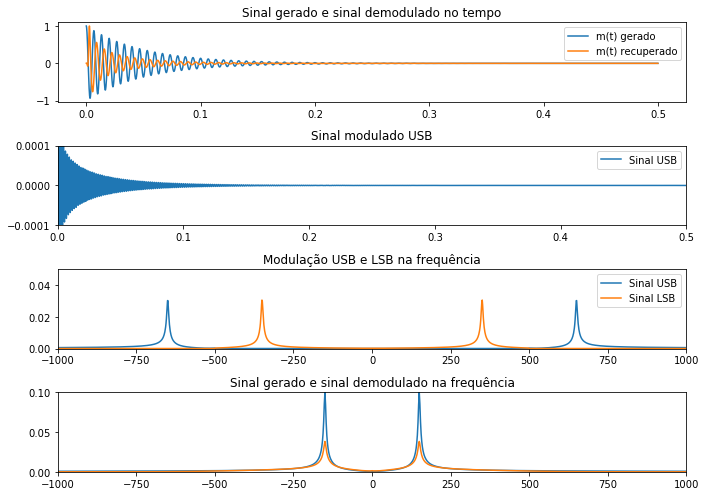

In [52]:
Ts=1e-4                                                    # Período de amostragem
fs=1/Ts                                                    # Frequencia de amostragem
t = np.arange(5e3)*Ts                                            # Definição do vetor tempo
fc = 500                                                   # Frequencia da portadora.
fm = 150                                                   # Frequencia do sinal
Am=1.0                                                       # Amplitude do sinal senoidal
Ac=1.0                                                       # Amplitude da portadora
Mu = Am/Ac                                                 # Indice de modulaçao.
carrier = Ac*np.cos(2*np.pi*fc*t)                                # Sinal portadora
m_t = Am*np.cos(2*np.pi*fm*t)*np.exp(-t*20)                        # Sinal mensagem
lmt = len(m_t)                                          # Comprimento do vetor mensagem
M_t = 2.0*np.abs(fftpack.fftshift(fftpack.fft(m_t,lmt)))/lmt          # Sinal na frequência
freq_m = np.arange(-fs/2,fs/2,fs/lmt)                  # Eixo da frequência para M_t

# Modulação SSB
# Modulação DSB-SC
x_AM = m_t*carrier                                        # Onda Modulada DSB-SC no tempo
lfft = len(x_AM)                                        # Comprimento do sinal DSB-SC
lfft = int(2**np.ceil(np.log2(lfft)))                                 # Comprimento do sinal DSB-SC potência de dois ex(1001 --> 1024)
X_AM = 2.0*np.abs(fftpack.fftshift(fftpack.fft(x_AM,lfft)))/lfft #Onda Modulada AM-DSB-SC na Frequência
freq = np.arange(-fs/2,fs/2,fs/lfft)                    # Eixo da frequência 
L_lsb = int(np.floor(fc*Ts*lfft))                       # Local na frequência que se encontra a LSB.

#filtragem da LSB
Filt_LSB = np.ones(lfft)                                    #Vetor filtro LSB (degrau) na frequencia 
Filt_LSB[lfft//2-L_lsb:lfft//2+L_lsb] = np.zeros(2*L_lsb)   # Definindo zeros na LSB
X_SSB_USB = X_AM*Filt_LSB                                 # Filtrando a frequência LSB

#filtragem da USB
Filt_USB = np.zeros(lfft)                                    #Vetor filtro USB na frequencia  
Filt_USB[lfft//2-L_lsb:lfft//2+L_lsb] = np.ones(2*L_lsb)   # DOnde tinha 1 agora tem 0
X_SSB_LSB = X_AM*Filt_USB                                 # Filtrando a frequência USB

#filtragem da USB
## Visualização SSB no tempo
# USB tempo
s_ssb_USB = np.real(fftpack.ifft(fftpack.fftshift(X_SSB_USB)))        # Inversa de fourrier
s_ssb_USB = s_ssb_USB[:lmt]                      # Ajustando o comprimento do vetor

# LSB tempo
s_ssb_LSB =  np.real(fftpack.ifft(fftpack.fftshift(X_SSB_LSB)))     # Inversa de fourrier
s_ssb_LSB = s_ssb_LSB[:lmt]                  # Ajustando o comprimento do vetor

# Demodulação
# Demodulação SSB-USB
from scipy import signal

s_dem_USB= s_ssb_USB*carrier*2                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                                  # Janelamento Hamming da banda
s_rec_USB=signal.lfilter(h,1e-4,s_dem_USB)                         # Sinal filtrado
#o que a filter faz?
lfft=len(s_rec_USB)                                     # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                                    # Transformando para uma potencia de 2
SSB_freq_USB = fftpack.fftshift(fftpack.fft(s_rec_USB,lfft)/lfft)          # Sinal recuperado na frequencia
s_rec_USB = (max(m_t)/max(s_rec_USB))*s_rec_USB            # Amplificando o sinal

# Demodulação SSB-LSB
s_dem_LSB= s_ssb_LSB*carrier*2;                            # Multiplicação com a portadora em fase
B_m=1000                                                   # Banda para filtragem 
h=signal.firwin(50,B_m*Ts)                              # Janelamento Hamming da banda
s_rec_LSB =signal.lfilter(h,1e-4,s_dem_LSB)                         # Sinal filtrado

lfft=len(s_rec_LSB)                                     # Comprimento do sinal recuperado
lfft=int(2**np.ceil(np.log2(lfft)))                                    # Transformando para uma potencia de 2
SSB_freq_LSB = fftpack.fftshift(fftpack.fft(s_rec_LSB,lfft)/lfft)          # Sinal recuperado na frequencia
s_rec_LSB = (max(m_t)/max(s_rec_LSB))*s_rec_LSB            # Amplificando o sinal


plt.figure(1,[10,7])
plt.subplot(411)
plt.title("Sinal gerado e sinal demodulado no tempo")
plt.plot(t,m_t,t,s_rec_USB)
#plt.xlim([0.0,0.1])
#plt.ylim([-2,2])
plt.legend(["m(t) gerado","m(t) recuperado"])

plt.subplot(412)
plt.title("Sinal modulado USB")
plt.plot(t,s_ssb_USB)
plt.legend(["Sinal USB"])
plt.ylim([-1e-4,1e-4])
plt.xlim([0,0.5])

plt.subplot(413)
plt.title("Modulação USB e LSB na frequência")
plt.plot(freq,(X_SSB_USB),freq,(X_SSB_LSB)) #normalização feita no meio do código
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.05])
plt.legend(["Sinal USB","Sinal LSB"])

plt.subplot(414)
plt.title("Sinal gerado e sinal demodulado na frequência")
plt.plot(freq_m,M_t,freq,2.0*np.abs(SSB_freq_USB)) #divisão por len(...) feita no código
plt.xlim([-1e3,1e3])
plt.ylim([0.0,0.1])


plt.tight_layout()
plt.show()

### QAM 
#### Sinal no tempo e frequência:
Gerar uma onda AM-DSB-Sc torna-se complicado a medida que necessita-se de filtros (passa baixa ou passa alta) de extrema precisão para que este elimine a frequência, por exemplo, LSB totalmente sem prejudicar na frequência USB. Por isso o uso de modulação em amplitude em quadratura (QAM) torna-se uma solução viável, sendo gerada com exatidão sem exigencia de filtros extremamente precisos.

In [1]:
#código de QAM por fazer